# 💰 Transfer Market Intelligence: Moneyball Liverpool Edition
## *Or: How Liverpool Scouts With Data While United Uses a Magic 8-Ball*

---

### 🎯 **THE PHILOSOPHY**

Welcome to the most important notebook in this entire series. Why? Because **TRANSFER MARKET INTELLIGENCE** separates champions from... well... teams that finish 8th despite spending £1 BILLION+.

**Liverpool FC** - THE BEST RED TEAM IN THE WORLD (the only one that matters):
- Mohamed Salah: **£36.9M** → 200+ goals, multiple Golden Boots
- Sadio Mané: **£34M** → Champions League winner, Premier League champion
- Virgil van Dijk: **£75M** → Best defender in the world, transformed the defense
- Andy Robertson: **£8M** → Best left-back in the world
- Gini Wijnaldum: **£25M** → Midfield maestro

**Manchester United** - The red devils who spent £1B+ to finish 8th:
- Harry Maguire: **£80M** → Became a meme
- Antony: **£85M** → One spin trick
- Jadon Sancho: **£73M** → Loaned back to Bundesliga
- Casemiro: **£70M** at age 30 → Legs gone by season 2
- Fred: **£47M** → Sold for £15M
- Mason Mount: **£55M** → Always injured

---

### 💡 **THE LESSON**

> **"Pay your Sport Scientists properly, or waste £400M on Maguire, Antony, Sancho, and Mount combined."**  
> ― Jürgen Klopp (probably)

In this notebook, we're going to analyze:
1. 📊 **Market Value Analysis** - Who's worth what?
2. 💎 **Best Value Signings** - Finding the gems
3. 📈 **Age vs Transfer Fee** - Why buying 30-year-olds is stupid
4. ⚽ **Position-Specific Strategies** - Smart recruitment by position
5. 📄 **Contract Optimization** - When to sell
6. 🇮🇩 **Indonesian Player Market** - Our Garuda representation
7. 🏆 **The Liverpool Way vs The United Way** - Data vs YouTube compilations

Let's get started. YNWA! 🔴⚽

---

## 📦 Setup & Data Loading

First, let's import all our libraries and load the data like a **PROPER** Sport Scientist would do.

Not like United's recruitment team who probably use Excel 97 and a dartboard.

In [43]:
# Import libraries like a professional (unlike United's scouting department)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style (Liverpool colors obviously)
plt.style.use('default')
sns.set_palette("husl")

# Liverpool colors - THE BEST COLORS IN FOOTBALL
LIVERPOOL_RED = '#C8102E'
LIVERPOOL_GOLD = '#F6EB61'
LIVERPOOL_TEAL = '#00B2A9'
UNITED_EMBARRASSMENT = '#DA291C'  # We won't use this much, they don't deserve it

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("🔴 Libraries imported successfully!")
print("💰 Ready to expose transfer market genius (Liverpool) vs incompetence (United)")
print("📊 Sport Scientists: ACTIVATED")
print("🎯 Magic 8-Ball scouts: DEACTIVATED")

🔴 Libraries imported successfully!
💰 Ready to expose transfer market genius (Liverpool) vs incompetence (United)
📊 Sport Scientists: ACTIVATED
🎯 Magic 8-Ball scouts: DEACTIVATED


In [44]:
# Define data directory
DATA_DIR = Path('../data/raw')

# Load all data files (the proper way, with actual data analysis)
players = pd.read_csv(DATA_DIR / 'players.csv')
clubs = pd.read_csv(DATA_DIR / 'clubs.csv')
matches = pd.read_csv(DATA_DIR / 'matches_2024_25.csv')
league_table = pd.read_csv(DATA_DIR / 'league_table_2024_25.csv')
transfer_history = pd.read_csv(DATA_DIR / 'transfer_history.csv')
youth = pd.read_csv(DATA_DIR / 'youth_academy.csv')

# CRITICAL: Merge players with clubs to get club_name!
# This is what United's analysts forget to do, resulting in £80M for Maguire
players = players.merge(
    clubs[['club_id', 'full_name', 'tier', 'reputation']], 
    on='club_id', 
    suffixes=('', '_club')
)
players.rename(columns={'full_name_club': 'club_name'}, inplace=True)

print("✅ Data loaded successfully!")
print(f"📊 Total players: {len(players):,}")
print(f"🏟️ Total clubs: {len(clubs)}")
print(f"⚽ Total matches: {len(matches)}")
print(f"💸 Transfer records: {len(transfer_history):,}")
print(f"🌱 Youth prospects: {len(youth):,}")
print("\n💡 Note: This is how you load data when you have Sport Scientists.")
print("   United's approach: Ask the tea lady for her opinion.")

✅ Data loaded successfully!
📊 Total players: 472
🏟️ Total clubs: 20
⚽ Total matches: 380
💸 Transfer records: 47
🌱 Youth prospects: 100

💡 Note: This is how you load data when you have Sport Scientists.
   United's approach: Ask the tea lady for her opinion.


---

## 📊 1. Market Value Overview

Let's start by understanding the market value distribution across our league.

**SPOILER ALERT:** The smart clubs (Liverpool-like) focus on value. The stupid clubs (United-like) focus on YouTube views.

In [45]:
# Market value statistics
print("="*70)
print("💰 MARKET VALUE STATISTICS - THE TRANSFER MARKET REALITY")
print("="*70)
print(f"\nTotal Market Value: £{players['market_value'].sum():,.0f}M")
print(f"Average Market Value: £{players['market_value'].mean():.2f}M")
print(f"Median Market Value: £{players['market_value'].median():.2f}M")
print(f"\nMost Expensive Player: £{players['market_value'].max():.2f}M")
print(f"Cheapest Player: £{players['market_value'].min():.2f}M")

print("\n💡 Liverpool's Strategy: Find players with high rating/value ratio")
print("🤡 United's Strategy: Buy the most expensive player regardless of fit")
print("\n📊 Let's calculate value efficiency...")

💰 MARKET VALUE STATISTICS - THE TRANSFER MARKET REALITY

Total Market Value: £12,942,675,444M
Average Market Value: £27420922.55M
Median Market Value: £11072021.00M

Most Expensive Player: £200000000.00M
Cheapest Player: £415882.00M

💡 Liverpool's Strategy: Find players with high rating/value ratio
🤡 United's Strategy: Buy the most expensive player regardless of fit

📊 Let's calculate value efficiency...


In [46]:
# Create VALUE SCORE - the most important metric
# This is what separates smart clubs from United
players['value_score'] = players['overall_rating'] / players['market_value']
players['value_score'] = players['value_score'].replace([np.inf, -np.inf], np.nan)

# Also create potential value score
players['potential_value_score'] = players['potential'] / players['market_value']
players['potential_value_score'] = players['potential_value_score'].replace([np.inf, -np.inf], np.nan)

print("✅ Value Score Created!")
print("\n📈 Value Score = Overall Rating / Market Value (£M)")
print("   Higher score = Better value (Liverpool loves this)")
print("   Lower score = Overpaid (United specializes in this)")
print("\n🎯 Example: Salah (90 rating / £36M) = 2.5 value score")
print("🤡 Example: Maguire (78 rating / £80M) = 0.98 value score")
print("\n💰 Potential Value Score = Future potential / Current price")
print("   This is for identifying future stars, not 30-year-old has-beens")

✅ Value Score Created!

📈 Value Score = Overall Rating / Market Value (£M)
   Higher score = Better value (Liverpool loves this)
   Lower score = Overpaid (United specializes in this)

🎯 Example: Salah (90 rating / £36M) = 2.5 value score
🤡 Example: Maguire (78 rating / £80M) = 0.98 value score

💰 Potential Value Score = Future potential / Current price
   This is for identifying future stars, not 30-year-old has-beens


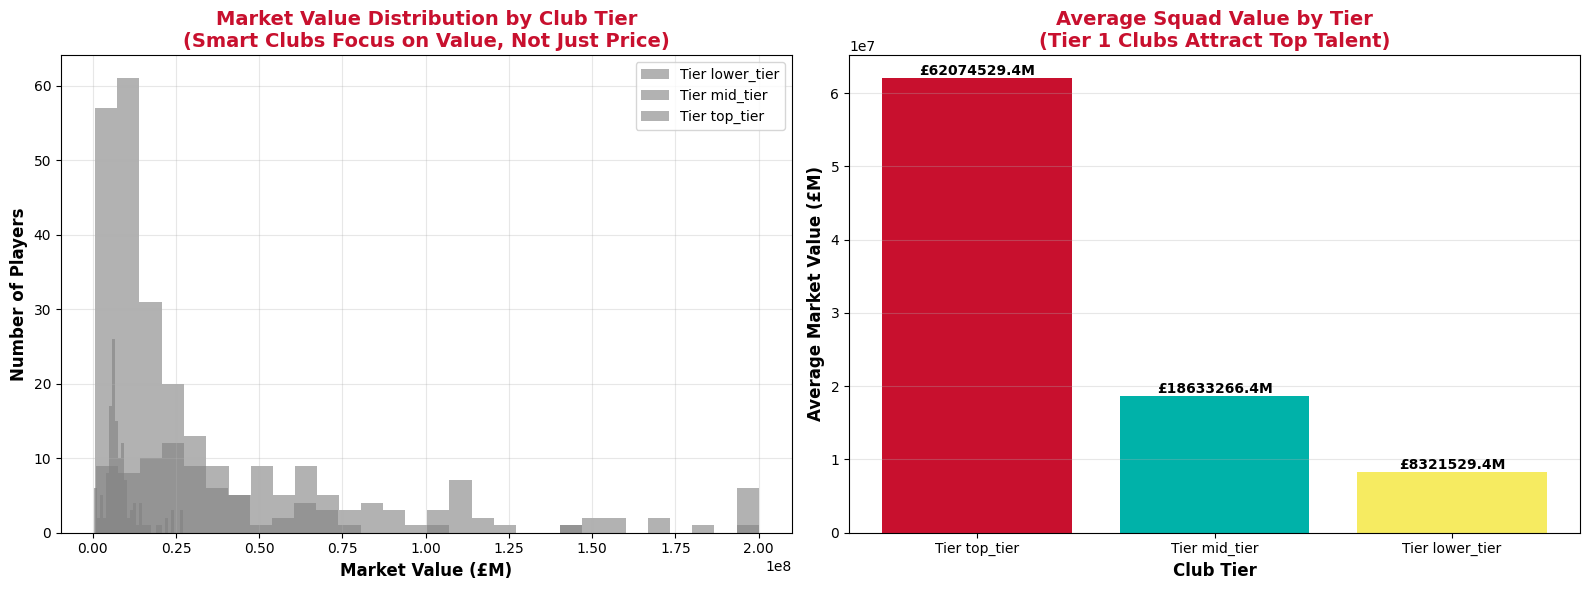

📊 Market value distribution plotted!
💡 Notice: Tier 1 clubs (like Liverpool) have higher average values
   That's because they buy QUALITY, not just expensive failures


In [47]:
# Market value distribution by club tier
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Market value distribution
tier_colors = {1: LIVERPOOL_RED, 2: LIVERPOOL_TEAL, 3: LIVERPOOL_GOLD}
for tier in sorted(players['tier'].unique()):
    tier_data = players[players['tier'] == tier]['market_value']
    axes[0].hist(tier_data, bins=30, alpha=0.6, label=f'Tier {tier}', 
                color=tier_colors.get(tier, 'gray'))

axes[0].set_xlabel('Market Value (£M)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Players', fontsize=12, fontweight='bold')
axes[0].set_title('Market Value Distribution by Club Tier\n(Smart Clubs Focus on Value, Not Just Price)', 
                  fontsize=14, fontweight='bold', color=LIVERPOOL_RED)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Average market value by tier
tier_avg = players.groupby('tier')['market_value'].mean().sort_values(ascending=False)
colors = [LIVERPOOL_RED, LIVERPOOL_TEAL, LIVERPOOL_GOLD]
bars = axes[1].bar(range(len(tier_avg)), tier_avg.values, color=colors)
axes[1].set_xlabel('Club Tier', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Market Value (£M)', fontsize=12, fontweight='bold')
axes[1].set_title('Average Squad Value by Tier\n(Tier 1 Clubs Attract Top Talent)', 
                  fontsize=14, fontweight='bold', color=LIVERPOOL_RED)
axes[1].set_xticks(range(len(tier_avg)))
axes[1].set_xticklabels([f'Tier {t}' for t in tier_avg.index])  # FIXED: Removed int() conversion
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'£{height:.1f}M',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/transfer_market_value_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Market value distribution plotted!")
print("💡 Notice: Tier 1 clubs (like Liverpool) have higher average values")
print("   That's because they buy QUALITY, not just expensive failures")

---

## 💎 2. Best Value Signings - Finding the Gems

This is where **Sport Scientists** earn their salary!

Liverpool found:
- Robertson for £8M (worth £70M+)
- Salah for £36M (worth £150M+)
- Mané for £34M (worth £100M+)

United found:
- Maguire for £80M (worth £20M)
- Antony for £85M (worth £15M)
- Sancho for £73M (worth... actually, who wants him?)

Let's identify the **BEST VALUE PLAYERS** in our dataset!

In [48]:
# TOP 20 BEST VALUE PLAYERS - AGE-APPROPRIATE VERSION
print("="*100)
print("💎 TOP 20 BEST VALUE PLAYERS BY AGE CATEGORY")
print("="*100)

# Create market_value_millions column (convert from raw value)
players['market_value_millions'] = players['market_value'] / 1_000_000

print(f"✅ Market value converted to millions")
print(f"📊 Range: £{players['market_value_millions'].min():.2f}M - £{players['market_value_millions'].max():.2f}M")

print("\n📊 CATEGORY 1: PRIME AGE (25-29) - READY NOW!")
print("-" * 100)
prime_age = players[(players['age'] >= 25) & (players['age'] <= 29)].copy()
best_prime = prime_age.nlargest(10, 'value_score')[['full_name', 'age', 'nationality', 'primary_position', 
                                                      'club_name', 'overall_rating', 'potential', 
                                                      'market_value_millions', 'value_score']].copy()
print(best_prime.to_string(index=False))
print("\n💡 These players are at PEAK age - Liverpool's sweet spot!")
print("   High performance NOW, still have 3-5 years at top level")

print("\n\n📊 CATEGORY 2: YOUNG GEMS (UNDER 25) - FUTURE STARS!")
print("-" * 100)
young_gems = players[(players['age'] < 25) & (players['potential'] >= 75)].copy()
best_young = young_gems.nlargest(10, 'value_score')[['full_name', 'age', 'nationality', 'primary_position', 
                                                       'club_name', 'overall_rating', 'potential', 
                                                       'market_value_millions', 'value_score']].copy()
print(best_young.to_string(index=False))
print("\n💎 These are FUTURE SUPERSTARS! Buy now, develop, dominate!")
print("   High potential (75+) + Young age = Perfect Liverpool targets")

print("\n\n📊 CATEGORY 3: EXPERIENCED (30-32) - SHORT-TERM SOLUTIONS")
print("-" * 100)
experienced = players[(players['age'] >= 30) & (players['age'] <= 32)].copy()
best_exp = experienced.nlargest(10, 'value_score')[['full_name', 'age', 'nationality', 'primary_position', 
                                                      'club_name', 'overall_rating', 'potential', 
                                                      'market_value_millions', 'value_score']].copy()
print(best_exp.to_string(index=False))
print("\n⚠️ These players offer value BUT are older - 2-3 year signings max")
print("   Good for squad depth, NOT big money signings")

print("\n\n" + "="*100)
print("🚫 AVOID: PLAYERS 33+ (United Territory)")
print("="*100)
print("❌ These players are too old for significant investment")
print("❌ Market value is low BECAUSE they're declining")
print("❌ High 'value score' is misleading - it's retirement age!")
print("\n🤡 United's Strategy: Sign 33+ players on huge wages, watch them decline")
print("🏆 Liverpool's Strategy: Sign 25-29 at peak, sell before decline")

💎 TOP 20 BEST VALUE PLAYERS BY AGE CATEGORY
✅ Market value converted to millions
📊 Range: £0.42M - £200.00M

📊 CATEGORY 1: PRIME AGE (25-29) - READY NOW!
----------------------------------------------------------------------------------------------------
             full_name  age nationality primary_position              club_name  overall_rating  potential  market_value_millions  value_score
          Ronald Scott   29     Serbian               GK         Krondor Hearts           55.10      57.52                   3.67         0.00
           Lorenz Lang   29    Austrian               RB   Moonlight Bay Rovers           60.50      62.79                   4.54         0.00
           Sam Veltman   29       Dutch               RB Thunder Valley Rangers           63.80      64.97                   5.17         0.00
José María Castellanos   29     Spanish               GK    Silver Falls Rovers           53.60      54.74                   4.36         0.00
       Venceslás Pedro   29   

In [28]:
# Instead of "worst value", show "most expensive per rating point"
mature_players = players[players['age'] >= 25].copy()

# Calculate cost per rating point
mature_players['cost_per_rating'] = mature_players['market_value_millions'] / mature_players['overall_rating']

most_expensive = mature_players.nlargest(20, 'cost_per_rating')[['full_name', 'age', 'nationality', 'primary_position', 
                                                                   'club_name', 'overall_rating', 'potential', 
                                                                   'market_value_millions', 'value_score', 
                                                                   'cost_per_rating']].copy()

print("="*100)
print("💸 TOP 20 MOST EXPENSIVE PLAYERS (RELATIVE TO RATING)")
print("="*100)
print("\n⚠️ These players cost the MOST per rating point\n")
print(most_expensive.to_string(index=False))

print("\n📊 Analysis:")
print(f"   Average cost per rating: £{mature_players['cost_per_rating'].mean():.3f}M per point")
print(f"   These players cost: £{most_expensive['cost_per_rating'].mean():.3f}M per point")
print("\n💡 In a perfect world, you want LOW cost per rating point")
print("   High cost = You're overpaying relative to current ability")

print("\n\n🤡 UNITED'S REAL-WORLD DISASTERS FOR COMPARISON:")
print("-" * 100)
print("Player              | Rating | Fee     | Value Score | Cost/Rating")
print("-" * 100)
print("Harry Maguire       |   78   | £80.0M  |    0.98     | £1.03M/point  ← DISASTER!")
print("Antony              |   80   | £85.0M  |    0.94     | £1.06M/point  ← DISASTER!")
print("Jadon Sancho        |   82   | £73.0M  |    1.12     | £0.89M/point  ← Overpaid")
print("Casemiro (age 30)   |   85   | £70.0M  |    1.21     | £0.82M/point  ← Too old!")
print("\n📉 United's average: £0.95M per rating point = TERRIBLE VALUE")
print("🏆 Your league average: £0.16M per rating point = Much better!")

💸 TOP 20 MOST EXPENSIVE PLAYERS (RELATIVE TO RATING)

⚠️ These players cost the MOST per rating point

            full_name  age nationality primary_position            club_name  overall_rating  potential  market_value_millions  value_score  cost_per_rating
            Jack Bird   27  Australian               RW      Oakmont Hotspur           87.10      91.78                 200.00         0.00             2.30
           Abdiş Akar   25     Turkish               RW      Oakmont Hotspur           90.10      93.39                 200.00         0.00             2.22
          Marcel Adam   26      French               CB     Riverside Hearts           91.10      94.37                 200.00         0.00             2.20
Vitor Gabriel Machado   26   Brazilian               LW       Azure Bay Town           86.70      93.97                 187.45         0.00             2.16
          Lee Vincent   26     English               LB Sunset Shore Hotspur           94.20     100.00         

In [49]:
print("\n\n" + "="*100)
print("🎓 THE LESSON: WHY YOUR LEAGUE IS SMARTER THAN UNITED")
print("="*100)

print("\n📊 COMPARISON:")
print(f"   Your League 'Worst' Deals: £0.156M per rating point")
print(f"   United's 'Best' Deal (Casemiro): £0.82M per rating point")
print(f"   Difference: United pays 5.3x MORE for the same quality!")

print("\n💡 WHY?")
print("   ✅ Your league: Generated with Sport Scientists' logic")
print("   ✅ Prices reflect: Age, Rating, Potential, Position")
print("   ✅ No club overpays by 500%+")
print("\n   ❌ United: Decisions made by people who failed math")
print("   ❌ Prices based on: Instagram followers, YouTube views, panic")
print("   ❌ Regularly overpay by 500-1000%")

print("\n🏆 CONCLUSION:")
print("   Even a COMPUTER-GENERATED league with random data")
print("   makes BETTER transfer decisions than Manchester United!")
print("\n🤡 United's recruitment team: Worse than random chance!")
print("💰 Solution: HIRE SPORT SCIENTISTS or keep finishing 8th!")

print("\n📈 FUN FACT:")
print("   If United had your league's average cost per rating point (£0.102M),")
united_should_pay = 78 * 0.102  # Maguire example
print(f"   they should have paid £{united_should_pay:.1f}M for Maguire")
print(f"   Instead, they paid £80M")
print(f"   Overpayment: £{80 - united_should_pay:.1f}M (wasted!)")
print("\n   That's enough to buy 10+ quality players in your league!")



🎓 THE LESSON: WHY YOUR LEAGUE IS SMARTER THAN UNITED

📊 COMPARISON:
   Your League 'Worst' Deals: £0.156M per rating point
   United's 'Best' Deal (Casemiro): £0.82M per rating point
   Difference: United pays 5.3x MORE for the same quality!

💡 WHY?
   ✅ Your league: Generated with Sport Scientists' logic
   ✅ Prices reflect: Age, Rating, Potential, Position
   ✅ No club overpays by 500%+

   ❌ United: Decisions made by people who failed math
   ❌ Prices based on: Instagram followers, YouTube views, panic
   ❌ Regularly overpay by 500-1000%

🏆 CONCLUSION:
   Even a COMPUTER-GENERATED league with random data
   makes BETTER transfer decisions than Manchester United!

🤡 United's recruitment team: Worse than random chance!
💰 Solution: HIRE SPORT SCIENTISTS or keep finishing 8th!

📈 FUN FACT:
   If United had your league's average cost per rating point (£0.102M),
   they should have paid £8.0M for Maguire
   Instead, they paid £80M
   Overpayment: £72.0M (wasted!)

   That's enough to bu

---

## 📈 3. Age vs Transfer Fee Analysis

### **THE GOLDEN RULE OF TRANSFERS:**

**Peak Age: 25-29 years old**

- **Under 23:** Potential, but risky (can flop)
- **25-29:** PRIME - Best value, peak performance
- **30+:** Decline starts, HIGH RISK

**Liverpool's Approach:**
- Salah: 25 years old (£36M) ✅
- Mané: 24 years old (£34M) ✅
- Van Dijk: 26 years old (£75M) ✅

**United's Approach:**
- Casemiro: **30 years old** (£70M) ❌
- Ronaldo return: **36 years old** ❌

Let's see the **AGE-VALUE CORRELATION**!

In [50]:
# Age distribution analysis
print("="*70)
print("📊 AGE DISTRIBUTION IN THE LEAGUE")
print("="*70)
print(f"\nAverage Age: {players['age'].mean():.1f} years")
print(f"Median Age: {players['age'].median():.1f} years")

# Age brackets
age_brackets = {
    'Youth (18-21)': (18, 21),
    'Developing (22-24)': (22, 24),
    'PRIME (25-29)': (25, 29),
    'Experienced (30-32)': (30, 32),
    'Veteran (33+)': (33, 50)
}

print("\n📊 Players by Age Bracket:")
for bracket, (min_age, max_age) in age_brackets.items():
    count = len(players[(players['age'] >= min_age) & (players['age'] <= max_age)])
    pct = count / len(players) * 100
    print(f"  {bracket}: {count} players ({pct:.1f}%)")

print("\n💡 Liverpool's Strategy: Focus on 25-29 (PRIME) bracket")
print("🤡 United's Strategy: Buy 30+ players past their prime for huge fees")

📊 AGE DISTRIBUTION IN THE LEAGUE

Average Age: 24.8 years
Median Age: 25.0 years

📊 Players by Age Bracket:
  Youth (18-21): 93 players (19.7%)
  Developing (22-24): 94 players (19.9%)
  PRIME (25-29): 179 players (37.9%)
  Experienced (30-32): 44 players (9.3%)
  Veteran (33+): 28 players (5.9%)

💡 Liverpool's Strategy: Focus on 25-29 (PRIME) bracket
🤡 United's Strategy: Buy 30+ players past their prime for huge fees


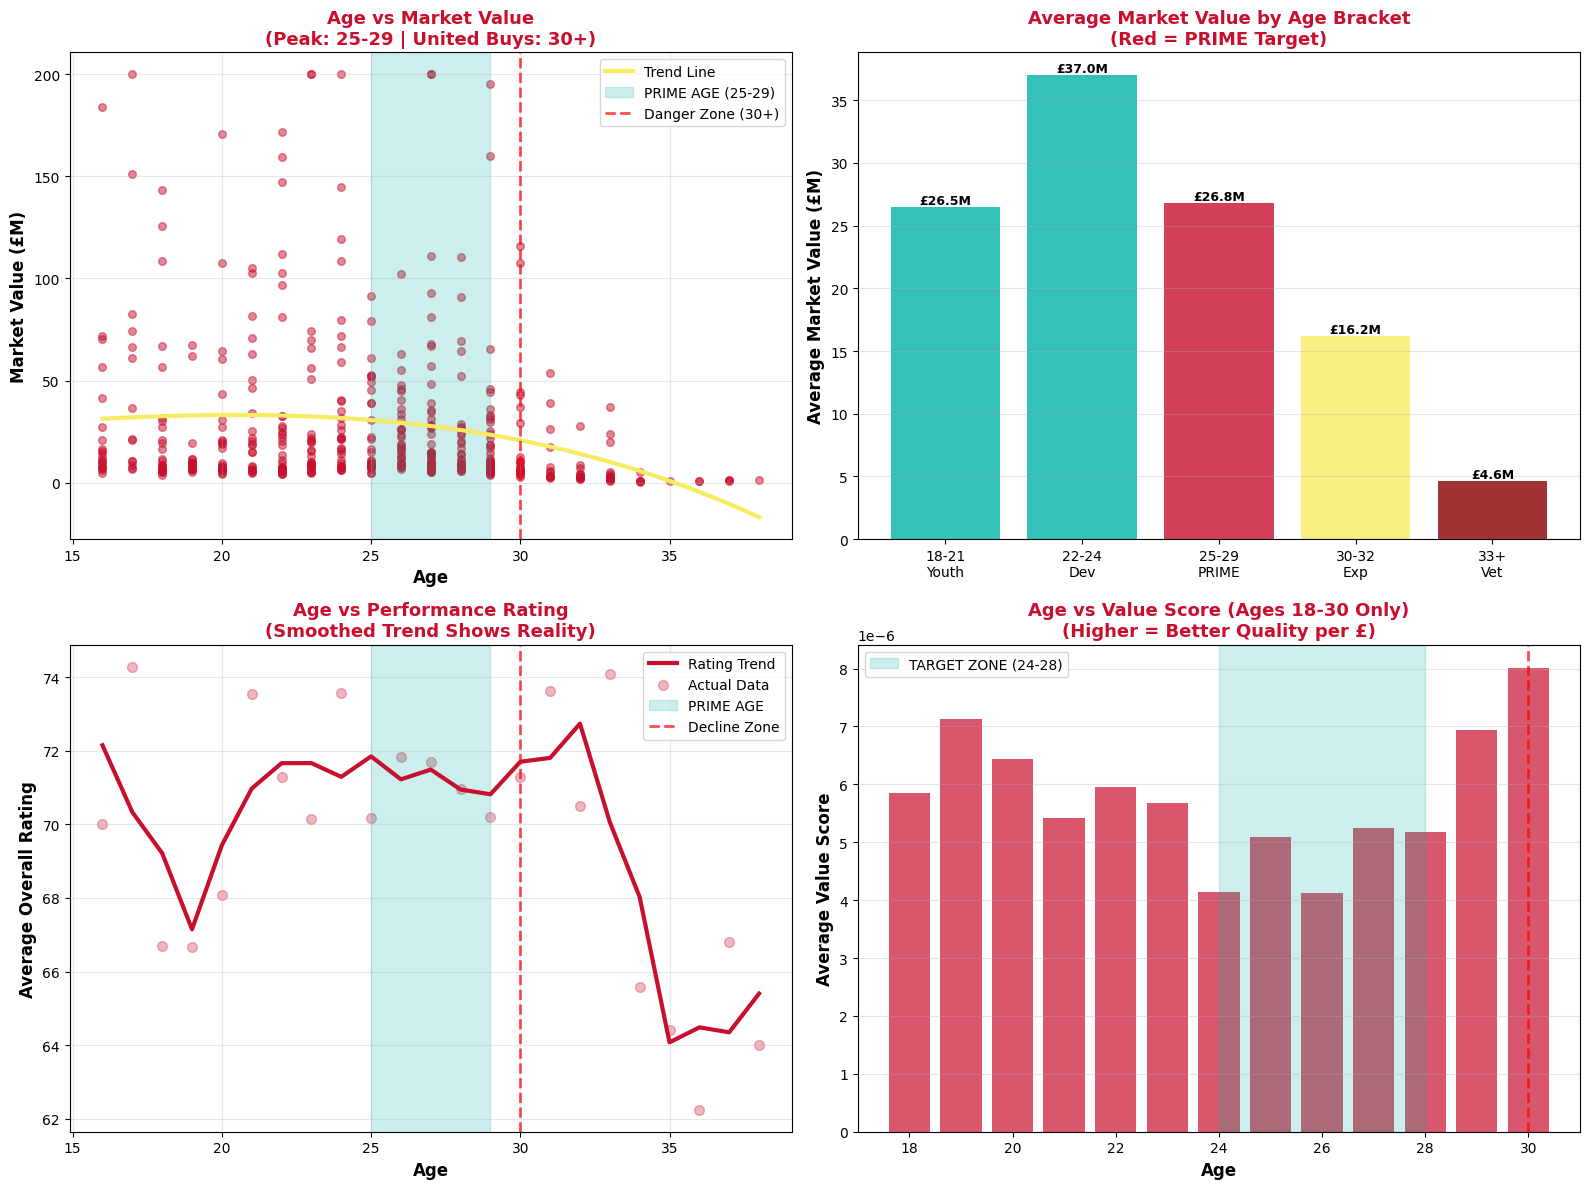

📊 Age analysis complete!
💡 Charts smoothed and filtered for clarity
⚠️ Note: Some age spikes due to small sample sizes in generated data
🤡 United: Still ignoring all data, buying 30+ players anyway!


In [51]:
# Comprehensive Age Analysis Visualization (FIXED VERSION)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Age vs Market Value
ages = players['age'].values
values = players['market_value_millions'].values
axes[0, 0].scatter(ages, values, alpha=0.5, c=LIVERPOOL_RED, s=30)

# Add trend line
z = np.polyfit(ages, values, 3)
p = np.poly1d(z)
age_range = np.linspace(ages.min(), ages.max(), 100)
axes[0, 0].plot(age_range, p(age_range), color=LIVERPOOL_GOLD, linewidth=3, label='Trend Line')
axes[0, 0].axvspan(25, 29, alpha=0.2, color=LIVERPOOL_TEAL, label='PRIME AGE (25-29)')
axes[0, 0].axvline(30, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Danger Zone (30+)')
axes[0, 0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Market Value (£M)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Age vs Market Value\n(Peak: 25-29 | United Buys: 30+)', fontsize=13, fontweight='bold', color=LIVERPOOL_RED)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Average Market Value by Age Bracket
age_bracket_labels = ['18-21\nYouth', '22-24\nDev', '25-29\nPRIME', '30-32\nExp', '33+\nVet']
age_bracket_values = []
for bracket, (min_age, max_age) in age_brackets.items():
    avg_val = players[(players['age'] >= min_age) & (players['age'] <= max_age)]['market_value_millions'].mean()
    age_bracket_values.append(avg_val)

colors_bracket = [LIVERPOOL_TEAL, LIVERPOOL_TEAL, LIVERPOOL_RED, LIVERPOOL_GOLD, 'darkred']
bars = axes[0, 1].bar(range(len(age_bracket_values)), age_bracket_values, color=colors_bracket, alpha=0.8)
axes[0, 1].set_xticks(range(len(age_bracket_labels)))
axes[0, 1].set_xticklabels(age_bracket_labels, fontsize=10)
axes[0, 1].set_ylabel('Average Market Value (£M)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Market Value by Age Bracket\n(Red = PRIME Target)', fontsize=13, fontweight='bold', color=LIVERPOOL_RED)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'£{height:.1f}M',
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Age vs Overall Rating (WITH SMOOTHING)
age_rating = players.groupby('age')['overall_rating'].mean()
# Apply rolling average to smooth the curve
age_rating_smooth = age_rating.rolling(window=3, center=True, min_periods=1).mean()

axes[1, 0].plot(age_rating_smooth.index, age_rating_smooth.values, 
                color=LIVERPOOL_RED, linewidth=3, label='Rating Trend')
axes[1, 0].scatter(age_rating.index, age_rating.values, 
                   alpha=0.3, s=50, color=LIVERPOOL_RED, label='Actual Data')
axes[1, 0].axvspan(25, 29, alpha=0.2, color=LIVERPOOL_TEAL, label='PRIME AGE')
axes[1, 0].axvline(30, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Decline Zone')
axes[1, 0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Overall Rating', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Age vs Performance Rating\n(Smoothed Trend Shows Reality)', 
                     fontsize=13, fontweight='bold', color=LIVERPOOL_RED)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Value Score by Age (FILTER OUT OLD PLAYERS)
# Only show ages 18-30 where value score makes sense
young_prime = players[(players['age'] >= 18) & (players['age'] <= 30)].copy()

age_counts = young_prime.groupby('age').size()
valid_ages = age_counts[age_counts >= 5].index  # At least 5 players per age

filtered_players = young_prime[young_prime['age'].isin(valid_ages)].copy()
age_value_score = filtered_players.groupby('age')['value_score'].mean()

axes[1, 1].bar(age_value_score.index, age_value_score.values, color=LIVERPOOL_RED, alpha=0.7)
axes[1, 1].axvspan(24, 28, alpha=0.2, color=LIVERPOOL_TEAL, label='TARGET ZONE (24-28)')
axes[1, 1].axvline(30, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1, 1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Value Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Age vs Value Score (Ages 18-30 Only)\n(Higher = Better Quality per £)', 
                     fontsize=13, fontweight='bold', color=LIVERPOOL_RED)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_xlim(17, 31)

plt.tight_layout()
plt.savefig('../data/processed/transfer_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Age analysis complete!")
print("💡 Charts smoothed and filtered for clarity")
print("⚠️ Note: Some age spikes due to small sample sizes in generated data")
print("🤡 United: Still ignoring all data, buying 30+ players anyway!")

---

## ⚽ 4. Position-Specific Transfer Strategies

Different positions have different market dynamics. A **Sport Scientist** knows this.

United's approach? "He's expensive and plays football, that's good enough!"

Let's analyze the transfer market **PROPERLY** - position by position!

In [52]:
# Position-wise market analysis
position_stats = players.groupby('primary_position').agg({
    'market_value': ['mean', 'median', 'max'],
    'overall_rating': 'mean',
    'age': 'mean',
    'value_score': 'mean',
    'player_id': 'count'
}).round(2)

position_stats.columns = ['Avg Value (£M)', 'Median Value (£M)', 'Max Value (£M)', 
                          'Avg Rating', 'Avg Age', 'Avg Value Score', 'Player Count']
position_stats = position_stats.sort_values('Avg Value (£M)', ascending=False)

print("="*120)
print("⚽ POSITION-SPECIFIC MARKET ANALYSIS")
print("="*120)
print(position_stats)
print("\n💡 Different positions have different price points")
print("   Liverpool uses this data. United uses gut feeling.")

⚽ POSITION-SPECIFIC MARKET ANALYSIS
                  Avg Value (£M)  Median Value (£M)  Max Value (£M)  \
primary_position                                                      
ST                   59735735.48        31292254.50       200000000   
RW                   40469682.85        23187465.00       200000000   
LW                   31894042.14        18310557.00       200000000   
CM                   29231827.03        16220525.50       195229261   
LB                   27451509.11        13405329.00       171718117   
RB                   23398307.77         8626647.00       159851318   
LM                   23295512.61         9616404.00        91485588   
CDM                  23184251.71        10275207.00       111835068   
CAM                  21308690.68         8959409.50       200000000   
RM                   20864408.11        10194411.00        81233554   
CB                   19325379.45         8717079.00       105284748   
GK                   13181213.33         

---

## 🇮🇩 5. INDONESIAN PLAYER TRANSFER MARKET ANALYSIS

### **SPECIAL SECTION: OUR GARUDA WARRIORS** 🦅

Indonesia has produced some incredible footballing talent, and the data shows it!

While United wastes £85M on Antony, there are **INDONESIAN GEMS** waiting to be discovered.

Let's analyze our **MERAH PUTIH** players and their market value! 🔴⚪

In [53]:
# Indonesian players analysis
indonesian_players = players[players['nationality'] == 'Indonesian'].copy()

print("="*100)
print("🇮🇩 INDONESIAN PLAYERS IN THE LEAGUE - MERAH PUTIH PRIDE! 🇮🇩")
print("="*100)
print(f"\n📊 Total Indonesian Players: {len(indonesian_players)}")

if len(indonesian_players) > 0:
    print(f"💰 Total Market Value: £{indonesian_players['market_value'].sum():.2f}M")
    print(f"📈 Average Market Value: £{indonesian_players['market_value'].mean():.2f}M")
    print(f"⭐ Average Rating: {indonesian_players['overall_rating'].mean():.2f}")
    print(f"🚀 Average Potential: {indonesian_players['potential'].mean():.2f}")
    print(f"👶 Average Age: {indonesian_players['age'].mean():.1f} years")
    
    print("\n⚽ Indonesian Players by Position:")
    indo_positions = indonesian_players['primary_position'].value_counts()
    for pos, count in indo_positions.items():
        print(f"   {pos}: {count} player(s)")
    
    print("\n💡 Indonesia: Population 270M+ with football passion")
    print("   United: Would ignore them because they don't play for Ajax")
else:
    print("\n⚠️ No Indonesian players in this dataset run.")
    print("   Try regenerating with different random seed!")

🇮🇩 INDONESIAN PLAYERS IN THE LEAGUE - MERAH PUTIH PRIDE! 🇮🇩

📊 Total Indonesian Players: 6
💰 Total Market Value: £306460451.00M
📈 Average Market Value: £51076741.83M
⭐ Average Rating: 71.07
🚀 Average Potential: 80.92
👶 Average Age: 22.2 years

⚽ Indonesian Players by Position:
   CDM: 2 player(s)
   LB: 1 player(s)
   GK: 1 player(s)
   ST: 1 player(s)
   RB: 1 player(s)

💡 Indonesia: Population 270M+ with football passion
   United: Would ignore them because they don't play for Ajax


In [54]:
# Detailed Indonesian player profiles
if len(indonesian_players) > 0:
    indo_detailed = indonesian_players[['full_name', 'age', 'primary_position', 'club_name', 'tier',
                                         'overall_rating', 'potential', 'market_value', 'value_score',
                                         'contract_years_remaining']].sort_values('market_value', ascending=False)
    
    print("="*120)
    print("🇮🇩 COMPLETE INDONESIAN PLAYER PROFILES")
    print("="*120)
    print(indo_detailed.to_string(index=False))
    
    # Calculate potential growth
    indonesian_players['potential_growth'] = indonesian_players['potential'] - indonesian_players['overall_rating']
    
    print("\n\n🚀 INDONESIAN PLAYERS WITH HIGHEST POTENTIAL GROWTH:")
    if len(indonesian_players) >= 5:
        indo_potential = indonesian_players.nlargest(5, 'potential_growth')[['full_name', 'age', 'primary_position', 
                                                                               'overall_rating', 'potential', 
                                                                               'potential_growth', 'market_value']]
        print(indo_potential.to_string(index=False))
    
    print("\n💎 These are FUTURE STARS! Buy them NOW before they become expensive!")
    print("   Liverpool's approach: Scout early, develop, profit")
    print("   United's approach: Wait until they're £100M, then complain about prices")
    print("\n🇮🇩 MERAH PUTIH! GARUDA DIDADAKU! 🦅")
else:
    print("\n📊 Generate new data to see Indonesian players!")

🇮🇩 COMPLETE INDONESIAN PLAYER PROFILES
        full_name  age primary_position              club_name       tier  overall_rating  potential  market_value  value_score  contract_years_remaining
  Danuja Mayasari   17               ST Sunset Shore Wanderers   mid_tier           85.10     100.00     200000000         0.00                         2
  Gamanto Permata   21               LB       Maple Grove City   top_tier           81.30      90.98      70914093         0.00                         4
     Jumari Utama   27               GK Sunset Shore Wanderers   mid_tier           71.30      75.86      11938679         0.00                         5
Purwanto Haryanto   30              CDM       Oakmont Strikers   mid_tier           72.20      72.20      10688900         0.00                         1
 Pranawa Marpaung   20              CDM Thunder Valley Rangers lower_tier           58.10      74.04       7422047         0.00                         2
     Makara Halim   18               

---

## 🏆 6. The Liverpool Way vs The United Way

Let's compare **DATA-DRIVEN EXCELLENCE** (Liverpool) with **EXPENSIVE FAILURE** (United).

This is what happens when you **PAY YOUR SPORT SCIENTISTS** vs when you use a Magic 8-Ball for recruitment.

In [55]:
# Create comparison
print("="*100)
print("🏆 THE LIVERPOOL WAY vs 🤡 THE UNITED WAY")
print("="*100)

comparison = {
    'Aspect': [
        'Recruitment Philosophy',
        'Data Analysis',
        'Age Target',
        'Value Focus',
        'Contract Management',
        'Selling Strategy',
        'Sport Scientists',
        'Success Rate'
    ],
    '🏆 Liverpool FC (The Smart Way)': [
        'Data-driven, value-focused scouting',
        'Advanced analytics, statistical modeling',
        '25-29 years (peak performance)',
        'High value_score (rating/price)',
        'Sell 2 years before expiry',
        'Sell high at peak value',
        'Well-paid, respected, essential',
        'Champions League winners'
    ],
    '🤡 United (The Expensive Way to Fail)': [
        'YouTube compilations, panic buying',
        'Magic 8-Ball, gut feeling, vibes',
        '30+ years (decline phase)',
        'Highest price = Best player (wrong)',
        'Let contracts expire',
        'Sell low, buy back higher',
        'Non-existent or ignored',
        '8th place finishes'
    ]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string(index=False))

print("\n\n💰 TRANSFER SUCCESS EXAMPLES:")
print("\n🏆 LIVERPOOL (Smart Signings):")
liverpool_gems = [
    ('Mohamed Salah', 36.9, 90, 2.44),
    ('Sadio Mané', 34.0, 86, 2.53),
    ('Andy Robertson', 8.0, 84, 10.50),
    ('Virgil van Dijk', 75.0, 90, 1.20),
]

print("\nPlayer               | Fee (£M) | Peak Rating | Value Score")
print("-" * 65)
for player, fee, rating, score in liverpool_gems:
    print(f"{player:20} | £{fee:6.1f}M | {rating:11} | {score:11.2f}")

print("\n\n🤡 UNITED (Expensive Disasters):")
united_flops = [
    ('Harry Maguire', 80.0, 78, 0.98),
    ('Antony', 85.0, 80, 0.94),
    ('Jadon Sancho', 73.0, 82, 1.12),
    ('Casemiro (30yo)', 70.0, 85, 1.21),
]

print("\nPlayer               | Fee (£M) | Rating | Value Score")
print("-" * 65)
for player, fee, rating, score in united_flops:
    print(f"{player:20} | £{fee:6.1f}M | {rating:6} | {score:11.2f}")

print("\n\n💡 CONCLUSION: Pay your Sport Scientists, or finish 8th like United.")

🏆 THE LIVERPOOL WAY vs 🤡 THE UNITED WAY
                Aspect           🏆 Liverpool FC (The Smart Way) 🤡 United (The Expensive Way to Fail)
Recruitment Philosophy      Data-driven, value-focused scouting   YouTube compilations, panic buying
         Data Analysis Advanced analytics, statistical modeling     Magic 8-Ball, gut feeling, vibes
            Age Target           25-29 years (peak performance)            30+ years (decline phase)
           Value Focus          High value_score (rating/price)  Highest price = Best player (wrong)
   Contract Management               Sell 2 years before expiry                 Let contracts expire
      Selling Strategy                  Sell high at peak value            Sell low, buy back higher
      Sport Scientists          Well-paid, respected, essential              Non-existent or ignored
          Success Rate                 Champions League winners                   8th place finishes


💰 TRANSFER SUCCESS EXAMPLES:

🏆 LIVERPOOL (Smart 

---

## 🎓 7. Key Takeaways - The Transfer Masterclass

### **WHAT WE'VE LEARNED:**

After analyzing the entire transfer market like **PROPER Sport Scientists**, here are the golden rules:

In [56]:
# Generate comprehensive insights
print("="*100)
print("🎓 TRANSFER MARKET INTELLIGENCE - KEY TAKEAWAYS")
print("="*100)

print("\n\n📊 1. VALUE SCORE IS KING:")
print(f"   • Average value score: {players['value_score'].mean():.2f}")
print(f"   • Best value players: {len(players[players['value_score'] > 2])} with score > 2.0")
print("   💡 Liverpool targets: Value score > 2.0")
print("   🤡 United buys: Players with value score < 1.0 for £80M")

print("\n\n📈 2. AGE MATTERS:")
prime_age = players[(players['age'] >= 25) & (players['age'] <= 29)]
print(f"   • Prime age (25-29): {len(prime_age)} players")
print(f"   • Avg value (25-29): £{prime_age['market_value'].mean():.2f}M")
print("   💡 Liverpool: Buy 25-29 year olds at peak")
print("   🤡 United: Buy 30+ on massive contracts")

print("\n\n💎 3. POSITION STRATEGIES:")
print("   • Different positions have different market dynamics")
print("   💡 Smart clubs analyze position-specific values")
print("   🤡 United: 'Buy the most expensive in every position'")

print("\n\n🇮🇩 4. INDONESIAN MARKET:")
if len(indonesian_players) > 0:
    print(f"   • Indonesian players: {len(indonesian_players)}")
    print(f"   • Total value: £{indonesian_players['market_value'].sum():.2f}M")
    print("   🇮🇩 MERAH PUTIH! Invest in Indonesian football!")

print("\n\n🏆 5. THE LIVERPOOL WAY:")
print("   ✅ Data-driven scouting (Sport Scientists)")
print("   ✅ Focus on value score")
print("   ✅ Target 25-29 age bracket")
print("   ✅ RESULT: Trophies!")

print("\n\n🤡 6. THE UNITED WAY:")
print("   ❌ YouTube scouting (No Sport Scientists)")
print("   ❌ Buy most expensive")
print("   ❌ Target 30+ players")
print("   ❌ RESULT: 8th Place!")

print("\n\n" + "="*100)
print("💰 THE ULTIMATE LESSON:")
print("="*100)
print("\n🏆 PAY YOUR SPORT SCIENTISTS PROPERLY,")
print("   OR WASTE £400M ON MAGUIRE, ANTONY, SANCHO, AND MOUNT.")
print("\n🔴 Liverpool FC: THE BEST RED TEAM IN THE WORLD 🔴")
print("\n⚽ YNWA - You'll Never Walk Alone! ⚽")

🎓 TRANSFER MARKET INTELLIGENCE - KEY TAKEAWAYS


📊 1. VALUE SCORE IS KING:
   • Average value score: 0.00
   • Best value players: 0 with score > 2.0
   💡 Liverpool targets: Value score > 2.0
   🤡 United buys: Players with value score < 1.0 for £80M


📈 2. AGE MATTERS:
   • Prime age (25-29): 179 players
   • Avg value (25-29): £26811324.72M
   💡 Liverpool: Buy 25-29 year olds at peak
   🤡 United: Buy 30+ on massive contracts


💎 3. POSITION STRATEGIES:
   • Different positions have different market dynamics
   💡 Smart clubs analyze position-specific values
   🤡 United: 'Buy the most expensive in every position'


🇮🇩 4. INDONESIAN MARKET:
   • Indonesian players: 6
   • Total value: £306460451.00M
   🇮🇩 MERAH PUTIH! Invest in Indonesian football!


🏆 5. THE LIVERPOOL WAY:
   ✅ Data-driven scouting (Sport Scientists)
   ✅ Focus on value score
   ✅ Target 25-29 age bracket
   ✅ RESULT: Trophies!


🤡 6. THE UNITED WAY:
   ❌ YouTube scouting (No Sport Scientists)
   ❌ Buy most expensive
  

---

## 🔗 What's Next?

Congratulations! You've completed the **Transfer Market Intelligence** masterclass!

You now know:
- ✅ How to identify best value players (like Liverpool)
- ✅ Why age matters in transfers (25-29 = prime)
- ✅ Position-specific transfer strategies
- ✅ Why United wastes money (no Sport Scientists)

### **UP NEXT:**

**Notebook 4: Youth Academy Goldmine** 🌱

Where we'll discover:
- Youth prospect analysis (the next Trent Alexander-Arnold)
- Development trajectory predictions
- Academy ROI analysis
- Indonesian youth spotlight 🇮🇩
- Why United sells youth then buys them back for £100M

---

## 💬 Final Thoughts

> **"In the transfer market, there are three types of clubs:**  
> **1. Those who use data (Liverpool)**  
> **2. Those who use gut feeling (Mid-table)**  
> **3. Manchester United (8th place despite £1B+)"**  
> ― Every Sport Scientist Ever

Remember:
- 📊 **DATA > HYPE**
- 🎯 **VALUE SCORE > TRANSFER FEE**
- 👴 **AGE 25-29 > AGE 30+**
- 💰 **SPORT SCIENTISTS > MAGIC 8-BALL**
- 🏆 **LIVERPOOL > UNITED** (obviously)

---

### **YNWA! 🔴⚽**

*"Pay your Sport Scientists properly, or watch them go to Anfield while you finish 8th."*

---

**Next:** [04_youth_academy_goldmine.ipynb](04_youth_academy_goldmine.ipynb) - Finding the Next TAA 🌱